(https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Cassandra1.jpeg/800px-Cassandra1.jpeg)
## Notebook to run batch Kaissandra methods

With this notebook you can run train, test or alternated train and test methods


In [1]:
import sys
import os

this_path = os.getcwd()
path = '\\'.join(this_path.split('\\')[:-1])+'\\'
if path not in sys.path:
    sys.path.insert(0, path)
    print(path+" added to python path")
else:
    print(path+" already in python path")
    
%load_ext autoreload
%autoreload 2

C:\Users\mgutierrez\root\Projects\SDC\py\kaissandra\ added to python path


In [2]:
# Import modules
import time

from kaissandra.config import configuration, retrieve_config
from kaissandra.testRNN import test_RNN
from kaissandra.trainRNN import train_RNN
from kaissandra.inputs import Data, run_train_test, build_and_test, build_and_train


#%reload_ext autoreload

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Get config structure

In [18]:
params = {'config_name':'CRNN02010',
          
          'movingWindow':500,
          'nEventsPerStat':5000,
          'feature_keys_manual':[],
          'feature_keys_tsfresh':[i for i in range(37,48)]+[49,50]+[i for i in range(52,68)],
           'var_feat_keys':[i for i in range(68,93)],
          'L':1,
          'size_hidden_layer':1024,
          'if_build_IO':True,
          'from_stats_file':False,
          'IDweights':'WRNN02010',
          'inverse_load':True,
          
          'IDresults':'RRNN02010',
          'startFrom':-1,
          'endAt':-1,
          'save_journal':False}
combine_ts = {'if_combine':False,'params_combine':[{'alg':'mean'}]}
params['combine_ts'] = combine_ts
config = configuration(params)

WARNING! Config values have been overwritten with entries values
Config file ../../config/CRNN02010.config exists. Loaded from disk


## Build inputs/outputs and train Network from Variations

In [ ]:
from kaissandra.inputs import Data, run_train_test, build_and_test, build_and_train
build_and_train(config)

## Build inputs/outputs and test Network from Variations

In [ ]:
from kaissandra.inputs import Data, run_train_test, build_and_test, build_and_train
build_and_test(config)

## Automately Train and Test from Variations

In [ ]:
# Automate train/test from variation features
from kaissandra.inputs import Data, run_train_test

if_train = True
if_test = True
its = 20
#configs = [config['config_name']]

#configs_list = []
# load configuration files
#for config_name in configs:
#    configs_list.append(retrieve_config(config_name))
# run train/test
#for config in configs_list:
# set automation-specific config fields
config['num_epochs'] = 1
config['startFrom'] = -1
config['endAt'] = -1
run_train_test(config, its, if_train, if_test)

In [22]:
config['combine_ts']

{'if_combine': False, 'params_combine': [{'alg': 'mean'}]}

In [7]:
from kaissandra.RNN import modelRNN

data=Data(movingWindow=config['movingWindow'],
              nEventsPerStat=config['nEventsPerStat'],
              lB=config['lB'], 
              dateTest=config['dateTest'],
              assets=config['assets'],
              channels=config['channels'],
              max_var=config['max_var'],
              feature_keys_manual=config['feature_keys_manual'],
              feature_keys_tsfresh=config['feature_keys_tsfresh'],
              var_feat_keys=config['var_feat_keys'])
    
model=modelRNN(data,
                   size_hidden_layer=config['size_hidden_layer'],
                   L=config['L'],
                   size_output_layer=config['size_output_layer'],
                   keep_prob_dropout=config['keep_prob_dropout'],
                   miniBatchSize=config['miniBatchSize'],
                   outputGain=config['outputGain'],
                   commonY=config['commonY'],
                   lR0=config['lR0'],
                   num_epochs=config['num_epochs'])
print(data.feature_keys_manual)
print(len(data.feature_keys_tsfresh)+len(data.var_feat_keys))
print(len(data.var_feat_keys))
print(data.n_feats_tsfresh+len(data.var_feat_keys))
print(data.nFeatures)

[]
54
25
99
99


In [ ]:
# test individual assets
assets = [16,17,27,29,30,32]
for asset in assets:
    ass_name = Data().AllAssets[str(asset)]
    try:
        config = configuration({'config_name':'C287INVO_'+ass_name,
                               'assets':[asset],
                               'IDresults':'C287INVO_'+ass_name})
    except OSError:
        config = retrieve_config('C287INVO_'+ass_name)
    test_RNN(config)

## Evaluate Results

In [68]:
import pandas as pd
from kaissandra.results2 import get_extended_results

list_results_names = ['100318INVO','100318R20','100318R20']
results_dir  = '../../RNN/results/'
ext = '.csv'
list_epochs = [15,29,28]
list_tis = [1,0,0]
list_mcs = [.7,.5,.5]
list_mds = [.7,.75,.75]
Journal = pd.DataFrame()
for l,name in enumerate(list_results_names):
    journal_filename = results_dir+name+'/journal/J_E'+str(list_epochs[l])+'TI'+str(list_tis[l])+'MC'+str(list_mcs[l])+'MD'+str(list_mds[l])+ext
    Journal = Journal.append(pd.read_csv(journal_filename,sep='\t')).sort_values(by=['Asset','DTi']).reset_index().drop(labels='level_0',axis=1)
    print(journal_filename)
#res_ext, log = get_extended_results(Journal,
#                                    5,
#                                    n_days, resultsDir, IDresults,
#                                    epoch, t_index, thr_mc, thr_md,
#                                    get_positions=False,pNZA=1)

../../RNN/results/100318INVO/journal/J_E15TI1MC0.7MD0.7.csv
../../RNN/results/100318R20/journal/J_E29TI0MC0.5MD0.75.csv
../../RNN/results/100318R20/journal/J_E28TI0MC0.5MD0.75.csv


In [69]:
print("shape")
print(Journal.shape[0])
#print(Journal)
n_days = 33*5+1
pos_dirname = '../../RNN/results/MERGED/positions/'
pos_filename = 'P_100318INVO_100318R20.csv'
res_ext, log = get_extended_results(Journal,
                                    5,
                                    n_days,
                                   get_positions=True,pos_dirname=pos_dirname,
                                   pos_filename=pos_filename)
print(res_ext)


shape
9619


100%|████████████████████████████████████████████████████████████████████████████| 9618/9618 [00:02<00:00, 4061.70it/s]


{'NSP': 39.795421334632245, 'SI1': 385.84999999999985, 'eROI4': -13.359543175662777, 'eROI2': 27.700456824336644, 'eROI5': -33.88954317566317, 'SI2': 178.84999999999985, 'NO': 2053, 'mSpread': 0.04760583652411108, 'NSP3': 52.362396492937165, 'sharpe': -8.929004845609478, 'SI4': -282.1500000000001, 'GSP': 80.71115440818315, 'eGROI': 68.76045682433703, 'eROI': -28.974325559663345, 'NOl2': 396.0, 'NSP5': 31.612274719922066, 'eGl1': 49.33477347201489, 'NOl1': 1657.0, 'SI3': -54.15000000000001, 'eRl1': -30.91222244225491, 'SI5': -480.15000000000003, 'eGl2': 19.42568335232196, 'SI': -312.15000000000003, 'NSP.5': 77.69118363370677, 'eRl2': 1.937896882591518, 'NSP4': 41.256697515830496, 'SI.5': 465.84999999999997, 'eROI3': 7.17045682433702, 'eROI.5': 58.495456824337964, 'NSP1': 73.79444715051144, 'eROI1': 48.23045682433843, 'NSP2': 63.711641500243545}


In [41]:
print("shape")
print(Journal.shape[0])
#print(Journal)
n_days = 33*5+1
pos_dirname = '../../RNN/results/MERGED/positions/'
pos_filename = 'P_100318INVO_100318R20_100318R20.csv'
res_ext, log = get_extended_results(Journal,5,n_days,
                                   get_positions=True,pos_dirname=pos_dirname,
                                   pos_filename=pos_filename)
print(res_ext)

shape
9414


100%|████████████████████████████████████████████████████████████████████████████| 9413/9413 [00:01<00:00, 5046.32it/s]


{'NSP': 40.32863849765258, 'SI1': 384.49999999999983, 'eROI4': -14.557696423722136, 'eROI2': 28.04230357627778, 'eROI5': -35.85769642372226, 'SI2': 163.50000000000003, 'NO': 2130, 'mSpread': 0.046841578435802673, 'NSP3': 51.97183098591549, 'sharpe': -8.905498923930248, 'SI4': -303.50000000000017, 'GSP': 80.46948356807512, 'eGROI': 70.64230357627794, 'eROI': -29.130258491982087, 'NOl2': 396.0, 'NSP5': 31.314553990610328, 'eGl1': 51.051955418111156, 'NOl1': 1734.0, 'SI3': -64.50000000000016, 'eRl1': -31.337225493286535, 'SI5': -504.5000000000001, 'eGl2': 19.590348158166634, 'SI': -312.5000000000001, 'NSP.5': 77.1830985915493, 'eRl2': 2.2069670013043896, 'NSP4': 40.751173708920184, 'SI.5': 472.49999999999983, 'eROI3': 6.742303576277957, 'eROI.5': 59.99230357627901, 'NSP1': 73.05164319248826, 'eROI1': 49.34230357627945, 'NSP2': 62.676056338028175}


In [76]:
positions = pd.read_csv(pos_dirname+pos_filename,sep='\t')
#print(positions)
pip_limit = 0.02
pos_under_2p = positions['spread']<pip_limit
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(positions[pos_under_2p]['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = 100*positions[pos_under_2p]['spread'].mean()
print("mean_spread")
print(mean_spread)
print("Number of pos under "+str(pip_limit))
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("total gross success rate")
print(tgsr)
print("gross success rate")
print(gsr)
print("total success rate")
print(tsr)
print("success rate")
print(sr)
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])

mean_spread
1.3893650793650802
Number of pos under 0.02
378
per under pip_limit
18.412079883097906
total gross success rate
80.71115440818315
gross success rate
76.19047619047619
total success rate
39.405747686312715
success rate
64.55026455026454
ROI for positions under 0.02
6.5178
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
27.698800000000006


In [40]:
positions = pd.read_csv(pos_dirname+pos_filename,sep='\t')
#print(positions)
pip_limit = 0.03
pos_under_2p = positions['spread']<pip_limit
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(positions[pos_under_2p]['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = 100*positions[pos_under_2p]['spread'].mean()
print("mean_spread")
print(mean_spread)
print("positions[pos_under_2p].shape[0]")
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("tgsr")
print(tgsr)
print("gsr")
print(gsr)
print("tsr")
print(tsr)
print("sr")
print(sr)
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])

mean_spread
1.9215471698113193
positions[pos_under_2p].shape[0]
795
per under pip_limit
37.32394366197183
tgsr
80.46948356807512
gsr
76.60377358490567
tsr
39.906103286384976
sr
58.61635220125786
ROI for positions under 0.03
8.3522
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
6.741400000000006


total mean GROI
0.039668888255834374
mean GROI of selected
0.039668888255834374
mean_spread of selected
0.015740596095842375
Number of pos under 0.025
728
per under pip_limit
100.0
total gross success rate
63.46153846153846
gross success rate
63.46153846153846
total success rate
57.82967032967033
success rate
57.82967032967033
GROI for positions under 0.025
28.87895065024742
ROI for positions under 0.025
17.419796692474172
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
10.678950650247419
# Assets
21


(728,)


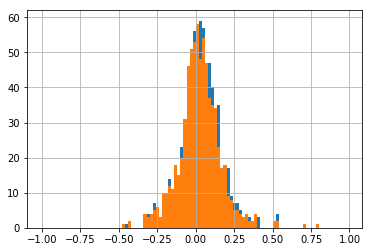

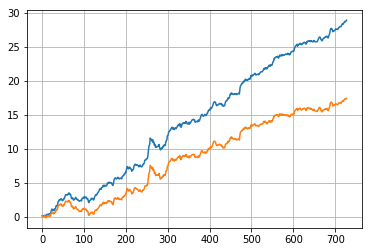

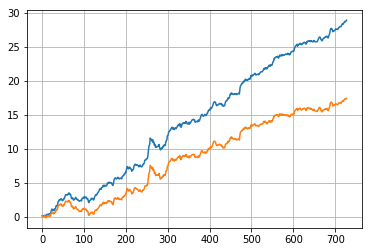

In [7]:
import matplotlib.pyplot as plt

plt.figure(0)
bins = [i/100 for i in range(-100,100,2)]
histG = plt.hist(pos_under_thr['GROI'], bins=bins)
histR = plt.hist(pos_under_thr['ROI'], bins=bins)
plt.grid()

#pos_under_thr.index = range(pos_under_thr.shape[0])
plt.figure(1)
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['GROI'].cumsum())
plt.plot(range(pos_under_thr.shape[0]),pos_under_thr['ROI'].cumsum())
plt.grid()

plt.figure(2)
#print(pos_under_thr['ROI'])
print(positions[pos_under_2p]['GROI'].shape)
cumG = plt.plot(positions['GROI'].cumsum())#, bins=bins
cumR = plt.plot(positions['ROI'].cumsum())
plt.grid()

Asset
AUDCAD    0.258453
AUDJPY    2.561115
CADJPY    0.115273
CHFJPY    0.083253
EURAUD    0.158090
EURCAD    1.241721
EURCHF   -0.073826
EURGBP    1.211509
EURJPY    2.397916
EURNZD    0.702530
EURUSD    1.688039
GBPAUD    1.507690
GBPCAD    1.516838
GBPCHF    0.165534
GBPJPY    0.272567
GBPUSD    1.458380
GOLD      0.552830
NZDUSD    0.979884
USDCAD    0.844591
USDCHF   -0.267375
USDJPY    0.044785
Name: ROI, dtype: float64
Di
10    0.144522
11    0.110953
12    2.161010
13   -0.039431
14    0.879686
15    0.051816
16   -0.652849
17   -0.067202
18    0.176842
19   -0.119154
20   -0.317240
21    1.165438
22    2.495202
23    1.459122
24    2.835595
25    3.475579
26    1.168712
27    1.010950
28    0.509897
31    0.220126
32    1.348528
33    0.036238
34   -0.013157
35    2.175946
36    0.991580
37    1.141514
38    1.322031
39    0.439963
40    1.563934
41    0.048359
42    0.543656
43    1.076231
44    0.581999
45    0.952553
Name: GROI, dtype: float64
Di
10    0.082639
11    0.031

(array([1., 7., 6., 4., 5., 4., 1., 1., 1., 2., 1., 0.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <a list of 12 Patch objects>)

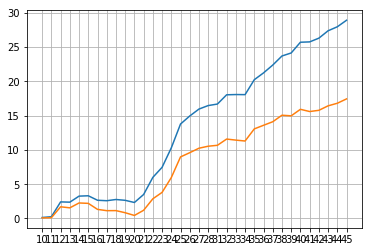

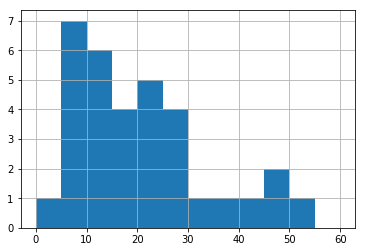

In [8]:
#positions
#grouped = pos_format.groupby(['asset'])
weekly_group = pos_under_thr.groupby([pd.to_datetime(pos_under_thr['Di']).dt.strftime('%W')])['ROI']
weekly_group_G = pos_under_thr.groupby([pd.to_datetime(pos_under_thr['Di']).dt.strftime('%W')])['GROI']
asset_group = pos_under_thr.groupby(['Asset'])
weekly_sum = weekly_group.sum()
weekly_sum_G = weekly_group_G.sum()
weekly_count = weekly_group.count()
#weekly_sum.cumsum()
#print(asset_group['GROI'].sum())
print(asset_group['ROI'].sum())
plt.figure(0)
plt.plot(weekly_sum_G.cumsum())
plt.plot(range(weekly_sum.shape[0]), weekly_sum.cumsum())
plt.grid()
print(weekly_sum_G)
print(weekly_sum)#.cumsum()
print(weekly_count)
print(weekly_sum.cumsum())
print(weekly_count.shape)
#print(pos_under_thr.groupby([pd.to_datetime(pos_under_thr['Di']).dt.strftime('%W')])['GROI'].sum())
#print(weekly_count)
plt.figure(1)
plt.grid()
plt.hist(weekly_count, bins=range(0,max(weekly_count),5))

#for name, group in asset_group:
#    print(name)
#    print(group.to_string())
#pd.to_datetime(positions['Di']).dt.strftime('%W')
#pd.to_datetime(positions['Di'])#.groupby('Name').resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

In [ ]:
# edit config without saving for test purposes
from kaissandra.testRNN import test_RNN
from kaissandra.config import *
config=retrieve_config('C0318INVO')
config['IDresults']='100318SR20'
config['save_journal'] = True
config['startFrom'] = 21
config['endAt']= 21
config['feats_from_bids'] = 'SHORT'
resolution = 20
config['resolution'] = resolution
config['thresholds_mc'] = [.5+i/resolution for i in range(int(resolution/2))]
config['thresholds_md'] = [.5+i/resolution for i in range(int(resolution/2))]

config['cost_name'] = '000318TI02'

test_RNN(config)

In [36]:
import pandas as pd

results_dir  = '../../RNN/results/'
ext = '.csv'
list_results_names = ['100318SR20']
list_epochs = [21]
list_tis = [3]
list_mcs = [.7]
list_mds = [.75]
Journal = pd.DataFrame()
for l,name in enumerate(list_results_names):
    journal_filename = results_dir+name+'/journal/J_E'+str(list_epochs[l])+'TI'+str(list_tis[l])+'MC'+str(list_mcs[l])+'MD'+str(list_mds[l])+ext
    new_journal = pd.read_csv(journal_filename,sep='\t')
    #if list_results_names[l]=='100350NROI':
    #    new_journal = new_journal[new_journal['Bet']<0]
    Journal = Journal.append(new_journal).sort_values(by=['Asset','DTi']).reset_index().drop(labels='level_0',axis=1)
    print(journal_filename)

../../RNN/results/100318SR20/journal/J_E21TI3MC0.7MD0.75.csv


In [37]:
from kaissandra.results2 import get_extended_results

print("shape")
print(Journal.shape[0])
print(journal_filename)
n_days = 33*5+1
pos_dirname = '../../RNN/results/MERGED/positions/'
pos_filename = '_'.join([entry for entry in list_results_names])
positions_summary, log = get_extended_results(Journal,
                                    5,
                                    n_days,
                                   get_positions=True,pos_dirname=pos_dirname,
                                   pos_filename=pos_filename+'.csv')
positions_summary


shape
562
../../RNN/results/100318SR20/journal/J_E21TI3MC0.7MD0.75.csv


100%|██████████████████████████████████████████████████████████████████████████████| 561/561 [00:00<00:00, 1152.65it/s]


{'GSP': 76.82926829268293,
 'GSPl': 0,
 'GSPs': 76.42276422764228,
 'NO': 246,
 'NOL': 0,
 'NOS': 246,
 'NOl1': 165.0,
 'NOl2': 81.0,
 'NSP': 43.90243902439025,
 'NSP.5': 73.98373983739837,
 'NSP1': 69.91869918699187,
 'NSP2': 63.82113821138211,
 'NSP3': 52.4390243902439,
 'NSP4': 42.68292682926829,
 'NSP5': 37.80487804878049,
 'SI': -19.920000000000005,
 'SI.5': 54.080000000000005,
 'SI1': 44.080000000000005,
 'SI2': 29.07999999999999,
 'SI3': 1.080000000000001,
 'SI4': -22.920000000000005,
 'SI5': -34.92,
 'eGROI': 8.705961121224655,
 'eGROIL': 0.0,
 'eGROIS': 8.705961121224655,
 'eGl1': 5.484269773860614,
 'eGl2': 3.221691347364038,
 'eROI': -2.745666932873803,
 'eROI.5': 7.475961121224666,
 'eROI1': 6.2459611212246235,
 'eROI2': 3.785961121224675,
 'eROI3': 1.325961121224653,
 'eROI4': -1.1340388787753464,
 'eROI5': -3.594038878775356,
 'eRl1': -2.5832372327342425,
 'eRl2': -0.16242970013956007,
 'mSpread': 0.04655133355324576,
 'sharpe': -2.197853786580406}

In [40]:
positions = pd.read_csv(pos_dirname+pos_filename+'.csv',sep='\t')
#print(positions)
pip_limit = 0.02
pos_under_2p = positions['espread']<pip_limit
#positions['DTo'] = positions["Do"] + positions["To"]
pos_under_thr = positions[pos_under_2p]#.sort_values(by=['DTo'])
per_under_2p = 100*sum(pos_under_2p)/positions.shape[0]
tgsr = 100*sum(positions['GROI']>0)/positions.shape[0]
gsr = 100*sum(pos_under_thr['GROI']>0)/sum(pos_under_2p)
tsr = 100*sum(positions['ROI']>0)/positions.shape[0]
sr = 100*sum(positions[pos_under_2p]['ROI']>0)/sum(pos_under_2p)
mean_spread = positions[pos_under_2p]['espread'].mean()
print("total mean GROI")
print(positions['GROI'].mean())
print("mean GROI of selected")
print(positions[pos_under_2p]['GROI'].mean())
print("mean_spread of selected")
print(mean_spread)
print("Number of pos under "+str(pip_limit))
print(positions[pos_under_2p].shape[0])
print("per under pip_limit")
print(per_under_2p)
print("total gross success rate")
print(tgsr)
print("gross success rate")
print(gsr)
print("total success rate")
print(tsr)
print("success rate")
print(sr)
print("GROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['GROI'].sum())
print("ROI for positions under "+str(pip_limit))
print(positions[pos_under_2p]['ROI'].sum())
print("positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]")
print(positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0])
print("# Assets")
print(positions['Asset'][pos_under_2p].unique().shape[0])
pos_under_thr.to_csv(pos_dirname+pos_filename+str(100*pip_limit)+'pFilt.csv', index=False, sep='\t')

total mean GROI
0.03539008585863684
mean GROI of selected
0.040017539477768295
mean_spread of selected
0.012332439919195807
Number of pos under 0.02
106
per under pip_limit
43.08943089430894
total gross success rate
76.82926829268293
gross success rate
78.30188679245283
total success rate
43.90243902439025
success rate
51.886792452830186
GROI for positions under 0.02
4.241859184643438
ROI for positions under 0.02
0.8177324713933549
positions['GROI'].sum()-pip_limit*positions['GROI'].shape[0]
3.785961121224654
# Assets
19
